In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('ToyotaCorolla.csv')

In [15]:
df.head

<bound method NDFrame.head of       Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0     13500   23  46986   Diesel   90         1          0  2000      3   
1     13750   23  72937   Diesel   90         1          0  2000      3   
2     13950   24  41711   Diesel   90         1          0  2000      3   
3     14950   26  48000   Diesel   90         0          0  2000      3   
4     13750   30  38500   Diesel   90         0          0  2000      3   
...     ...  ...    ...      ...  ...       ...        ...   ...    ...   
1431   7500   69  20544   Petrol   86         1          0  1300      3   
1432  10845   72  19000   Petrol   86         0          0  1300      3   
1433   8500   71  17016   Petrol   86         0          0  1300      3   
1434   7250   70  16916   Petrol   86         1          0  1300      3   
1435   6950   76      1   Petrol  110         0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1

In [21]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

In [23]:
df.describe

<bound method NDFrame.describe of       Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0     13500   23  46986   Diesel   90         1          0  2000      3   
1     13750   23  72937   Diesel   90         1          0  2000      3   
2     13950   24  41711   Diesel   90         1          0  2000      3   
3     14950   26  48000   Diesel   90         0          0  2000      3   
4     13750   30  38500   Diesel   90         0          0  2000      3   
...     ...  ...    ...      ...  ...       ...        ...   ...    ...   
1431   7500   69  20544   Petrol   86         1          0  1300      3   
1432  10845   72  19000   Petrol   86         0          0  1300      3   
1433   8500   71  17016   Petrol   86         0          0  1300      3   
1434   7250   70  16916   Petrol   86         1          0  1300      3   
1435   6950   76      1   Petrol  110         0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3    

In [25]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [56]:
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)

In [51]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

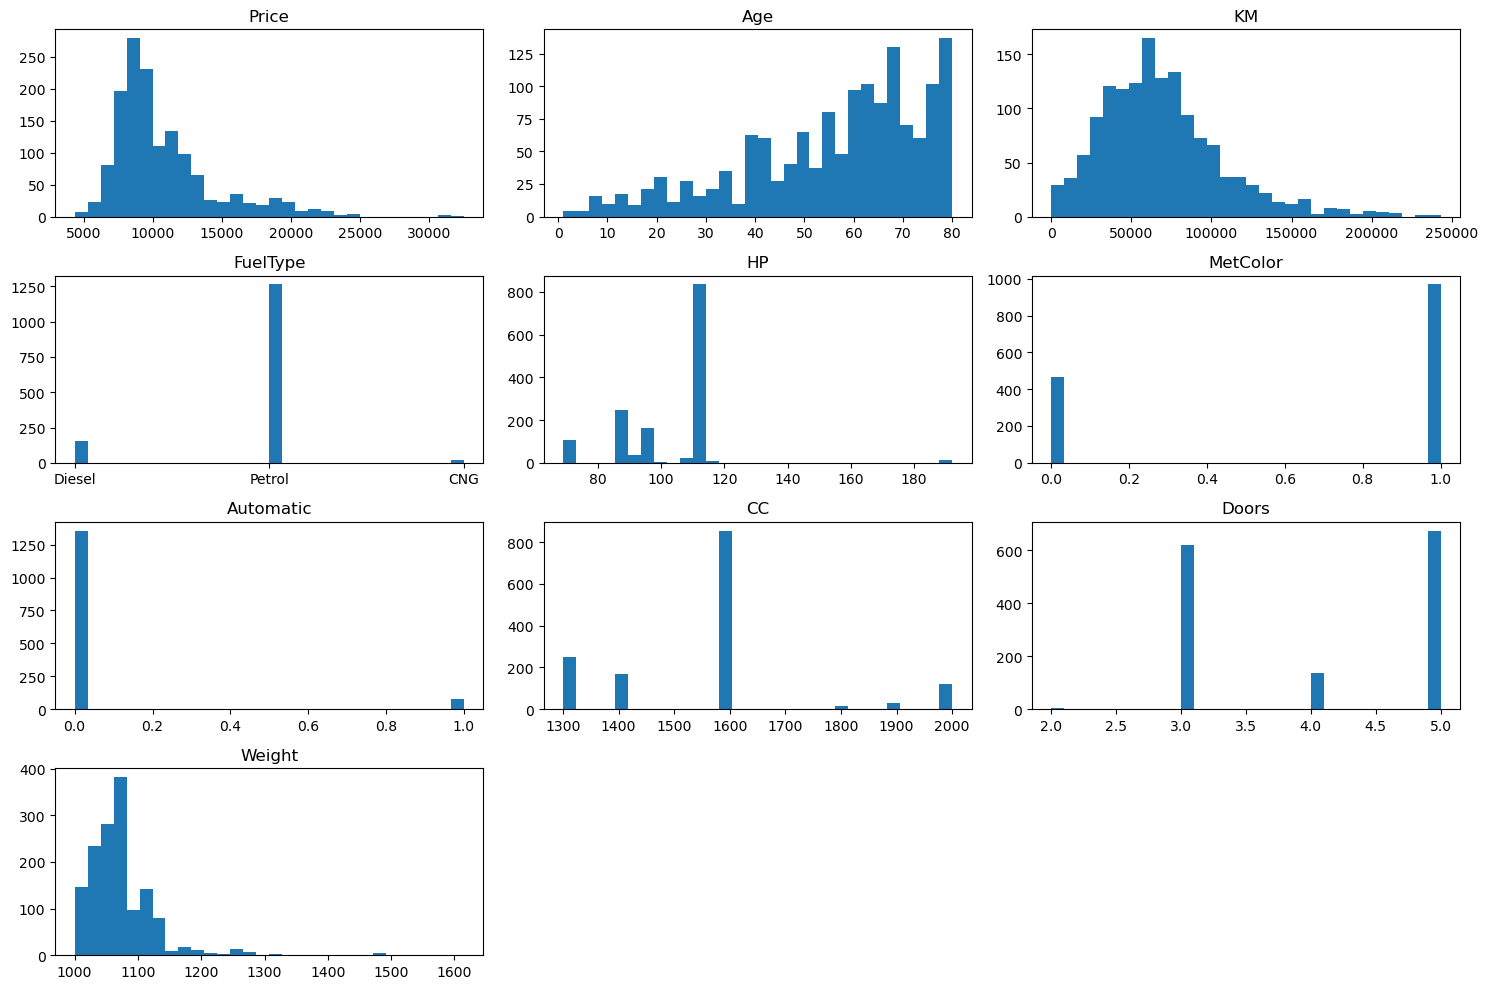

In [53]:
columns = ['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']
num_columns = len(columns)

nrows = (num_columns + 2 ) // 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].hist(df[column].dropna(), bins=30) # Drop NA values for plotting
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [66]:
df.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [70]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
cat_encoded = encoder.fit_transform(df[['FuelType']])
cat_encoded

,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [76]:
df1 = pd.concat([df,cat_encoded], axis=1)
df1.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,0.0,1.0,0.0


In [78]:
 df1.drop('FuelType', axis=1, inplace=True)

In [82]:
df1.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

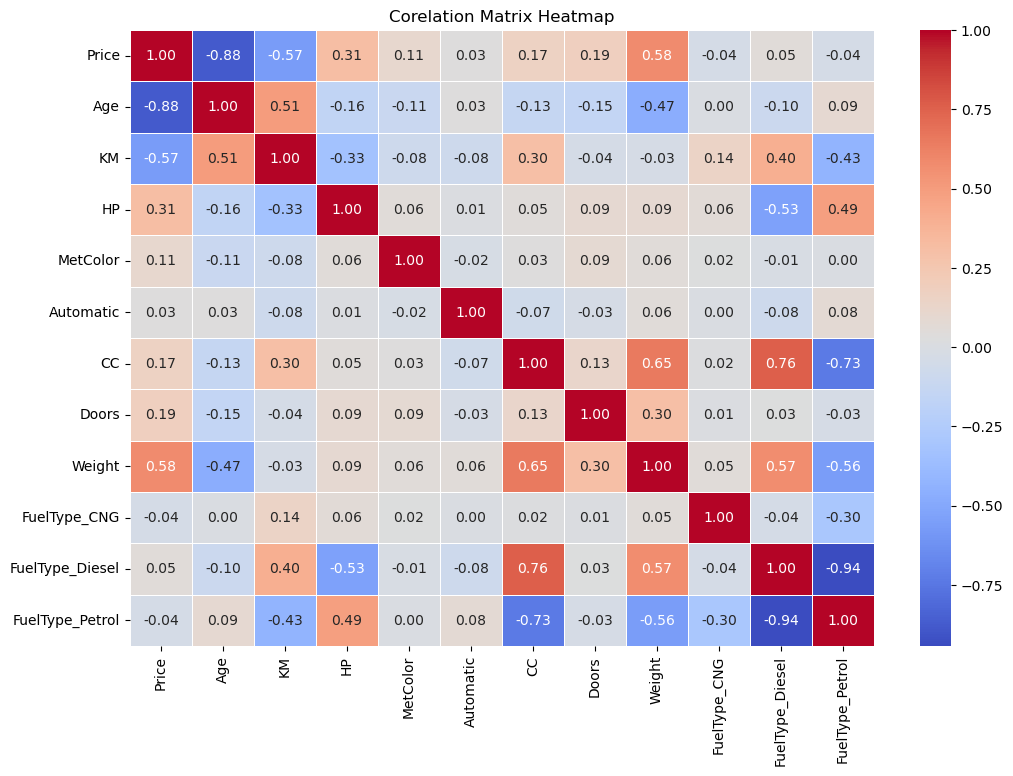

In [86]:
corelation_matrix = df1[['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", lw = .5)
plt.title('Corelation Matrix Heatmap')
plt.show()

In [88]:
X = df1[['Age', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors','Weight','FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']]

y = df1[['Price', 'KM']]

In [92]:
scaler = StandardScaler()

In [94]:
X = pd.DataFrame(data=scaler.fit_transform(X), columns = X.columns)

In [96]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3)


In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predicted = lr.predict(X_test)

In [104]:
print(X_test.shape, predicted.shape)

(431, 10) (431, 2)


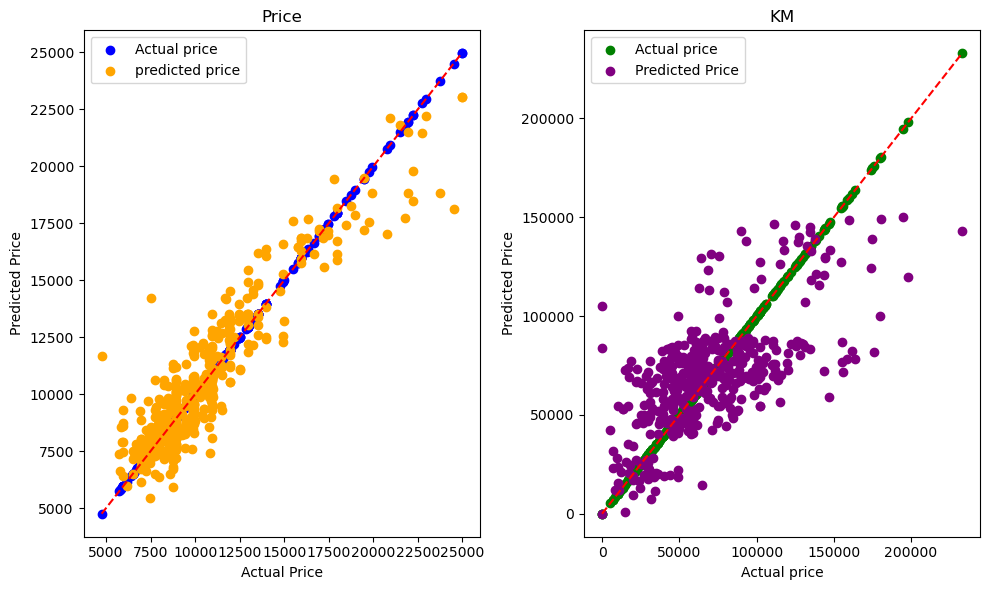

In [120]:
plt.figure(figsize=(10,6))

ax1 = plt.subplot(121)
ax1.scatter(y_test['Price'], y_test['Price'], color='blue', label='Actual price')
ax1.scatter(y_test['Price'], predicted[:, 0], color='orange', label='predicted price')
ax1.plot([min(y_test['Price']),max(y_test['Price'])], [min(y_test['Price']), max(y_test['Price'])], color='red', linestyle='--')
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title('Price')
ax1.legend(loc='upper left')

#Second Subplot for KM

ax2 = plt.subplot(122)
ax2.scatter(y_test['KM'], y_test['KM'], color='green', label='Actual price')
ax2.scatter(y_test['KM'], predicted[:,1], color='purple', label="Predicted Price")
ax2.plot([min(y_test['KM']), max(y_test['KM'])], [min(y_test["KM"]), max(y_test['KM'])], color='red', linestyle='--')
ax2.set_xlabel('Actual price')
ax2.set_ylabel('Predicted Price')
ax2.set_title('KM')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [122]:
predicted

array([[1.17145358e+04, 6.00480641e+04],
       [1.74112957e+04, 1.96912446e+04],
       [8.45124065e+03, 1.35564179e+05],
       [1.11818720e+04, 5.34458705e+04],
       [1.09434182e+04, 5.47370279e+04],
       [1.54487165e+04, 2.79561328e+04],
       [7.88158665e+03, 7.77138612e+04],
       [8.99243765e+03, 1.27320840e+05],
       [1.34588592e+04, 4.07294996e+04],
       [1.28121779e+04, 4.60805608e+04],
       [1.16473167e+04, 5.46846565e+04],
       [6.69221517e+03, 8.23001579e+04],
       [8.46614110e+03, 6.86992081e+04],
       [8.22076450e+03, 8.40914558e+04],
       [8.74795227e+03, 6.66367359e+04],
       [8.66917350e+03, 7.13315639e+04],
       [2.30559389e+04, 5.28039643e+04],
       [7.37105084e+03, 8.68101612e+04],
       [7.19799085e+03, 7.79803328e+04],
       [8.97011066e+03, 7.42781420e+04],
       [1.03300681e+04, 6.51542035e+04],
       [7.27095091e+03, 8.29266327e+04],
       [9.81090737e+03, 6.40478708e+04],
       [1.10201068e+04, 5.90318276e+04],
       [1.000917

In [126]:
#Calculating Metrics
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
r2_score = metrics.r2_score(y_test, predicted)
print(mae,mse,r2_score)

11245.424238517406 393828511.04452705 0.6440722314822394


In [148]:
for i , column in enumerate(y_test.columns):
    mae = metrics.mean_absolute_error(y_test[column], predicted[:,i])
    mse = metrics.mean_squared_error(y_test[column], predicted[:,i])
    r2_score = metrics.r2_score(y_test[column], predicted[:,i])
    print(f"Metrics for target {column}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2_score:  {r2_score}")
    print('-'*50)
    

Metrics for target Price:
MAE: 1007.8880041551246
MSE: 1853768.0971598576
R2_score:  0.8503988781456124
--------------------------------------------------
Metrics for target KM:
MAE: 21482.960472879695
MSE: 785803253.9918946
R2_score:  0.43774558481886594
--------------------------------------------------
